In [2]:
# Load the iris dataset using sklearn.datasets.load_iris(). 
# The data is on classifying flowers.

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

iris = load_iris()
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
# Scale the data such that each variable has unit variance.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = iris['data']
y = iris['target']

X_scaled = scaler.fit_transform(X)
X_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [4]:
# Assume there are three clusters. Fit a K-Means model, an Agglomerative 
# Model and a DBSCN model with min sample equal to 2 and eps equal to 2.4.
# Store the cluster assignments in a DataFrame. 

In [5]:
# Kmeans

from sklearn.cluster import KMeans  

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

df = pd.DataFrame(X, columns = iris['feature_names'])
df['cluster_kmeans'] = kmeans.labels_
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_kmeans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# Agglomerative

from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_scaled)

df['cluster_agg'] = agg.labels_
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_kmeans,cluster_agg
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [7]:
# DBScan

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=2, eps=1)
dbscan.fit(X_scaled)

df['cluster_dbscan'] = dbscan.labels_
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_kmeans,cluster_agg,cluster_dbscan
0,5.1,3.5,1.4,0.2,0,1,0
1,4.9,3.0,1.4,0.2,0,1,0
2,4.7,3.2,1.3,0.2,0,1,0
3,4.6,3.1,1.5,0.2,0,1,0
4,5.0,3.6,1.4,0.2,0,1,0


In [8]:
# Read up about the Silhouette Score. What does it do? Compute the 
# silhouette scores using sklearn.metrics.silhouette_score() for each 
# cluster type versus the scaled features.

# The score is bounded between -1 for incorrect clustering and +1 for
# highly dense clustering. Scores around zero indicate overlapping 
# clusters. The score is higher when clusters are dense and well separated,
# which relates to a standard concept of a cluster.

from sklearn import metrics

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_scaled, kmeans.labels_))

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_scaled, agg.labels_))

# To compute the Silhouette Score for DCSCAN clsutering one needs to get 
# rid of the noise

df.loc[df["cluster_dbscan"]==-1] # Identifying the noise

df_scaled=pd.DataFrame(X_scaled)
df_scaled.drop([41,], inplace = True) # Deleting the noise

labels = pd.DataFrame(dbscan.labels_)
labels.drop([41,], inplace = True) # Deleting the noise

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df_scaled, labels))

Silhouette Coefficient: 0.459
Silhouette Coefficient: 0.446
Silhouette Coefficient: 0.585


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
# Add sepal width and petal length including the corresponding original
# names to the DataFrame. (Beware of the dimensionality)

# Already included

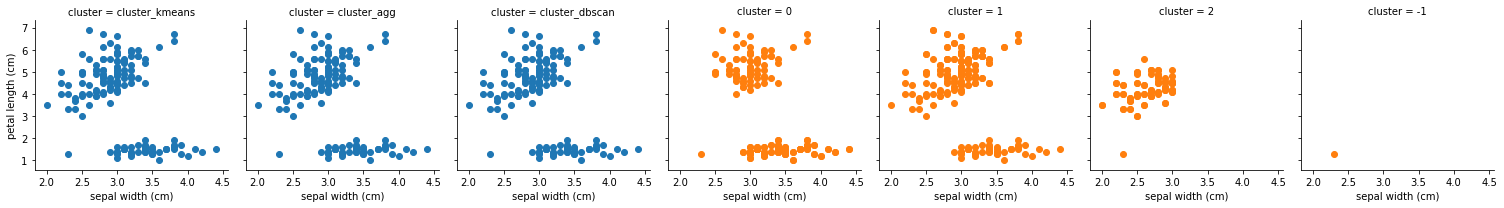

In [12]:
# Plot a three-fold scatter plot using sepal width as x-variable and petal
# length as y-variable, with dots colored by the cluster assignment and 
# facets by cluster algorithm. (Hint: Melt the DataFrame using columns
# ”sepal length (cm)” and ”sepal width (cm)” as id variables.)

%matplotlib inline
import seaborn as sns

df = df.melt(id_vars=["sepal length (cm)","sepal width (cm)", "petal width (cm)",
                      "petal length (cm)", ], var_name = "cluster method", value_name="cluster")

g = sns.FacetGrid(df, hue="cluster method", col = "cluster")
g = g.map(plt.scatter, "sepal width (cm)", "petal length (cm)")